In [2]:
import cupy as cp
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import rism
from rism.core import FFTGrid
from rism.solver import OZSolventPicard3DSolver
from rism.unit import *

In [3]:
def visualize(grid, h, c, is_2d=True):
    half = grid.shape[2] // 2
    fig, ax = plt.subplots(1, 3, figsize=[25, 9])
    g = h + 1
    gamma = h - c
    if is_2d:
        target = (slice(None, None), slice(None, None), half)
        x = grid.x[target].get()
        y = grid.y[target].get()
        all_res = cp.stack([c, gamma])
        norm = matplotlib.colors.Normalize(
            vmin=all_res.min().get(), vmax=all_res.max().get()
        )
        cb1 = ax[0].contour(x, y, g[target].get(), 50)
        cb2 = ax[1].contour(x, y, c[target].get(), 50, norm=norm)
        ax[2].contour(x, y, gamma[target].get(), 50, norm=norm)
        fig.subplots_adjust(left=0.12, right=0.9)
        position = fig.add_axes([0.05, 0.10, 0.015, 0.80])
        cb1 = fig.colorbar(cb1, cax=position)
        position = fig.add_axes([0.92, 0.10, 0.015, 0.80])
        cb1 = fig.colorbar(cb2, cax=position)
    else:
        target = (slice(None, None), half, half)
        x = grid.x[target].get()
        ax[0].plot(x, g[target].get(), ".-")
        ax[1].plot(x, c[target].get(), ".-")
        ax[2].plot(x, gamma[target].get(), ".-")
    ax[0].set_title("g")
    ax[1].set_title("c")
    ax[2].set_title(r"$\gamma$")
    plt.show()


Iteration 0, Residual 2.382e-03
Iteration 10, Residual 5.406e-04
Iteration 20, Residual 3.195e-04
Iteration 30, Residual 2.108e-04
Iteration 40, Residual 1.463e-04
Iteration 50, Residual 1.045e-04
Iteration 60, Residual 7.602e-05
Iteration 70, Residual 5.596e-05
Iteration 80, Residual 4.154e-05
Iteration 90, Residual 3.102e-05
Iteration 100, Residual 2.326e-05
Iteration 110, Residual 1.750e-05
Iteration 120, Residual 1.320e-05
Iteration 130, Residual 9.977e-06
Stop iterate at 130 steps, residual 9.977e-06 smaller than tolerance 1.000e-05
Run solve() for 3.3388540744781494 s


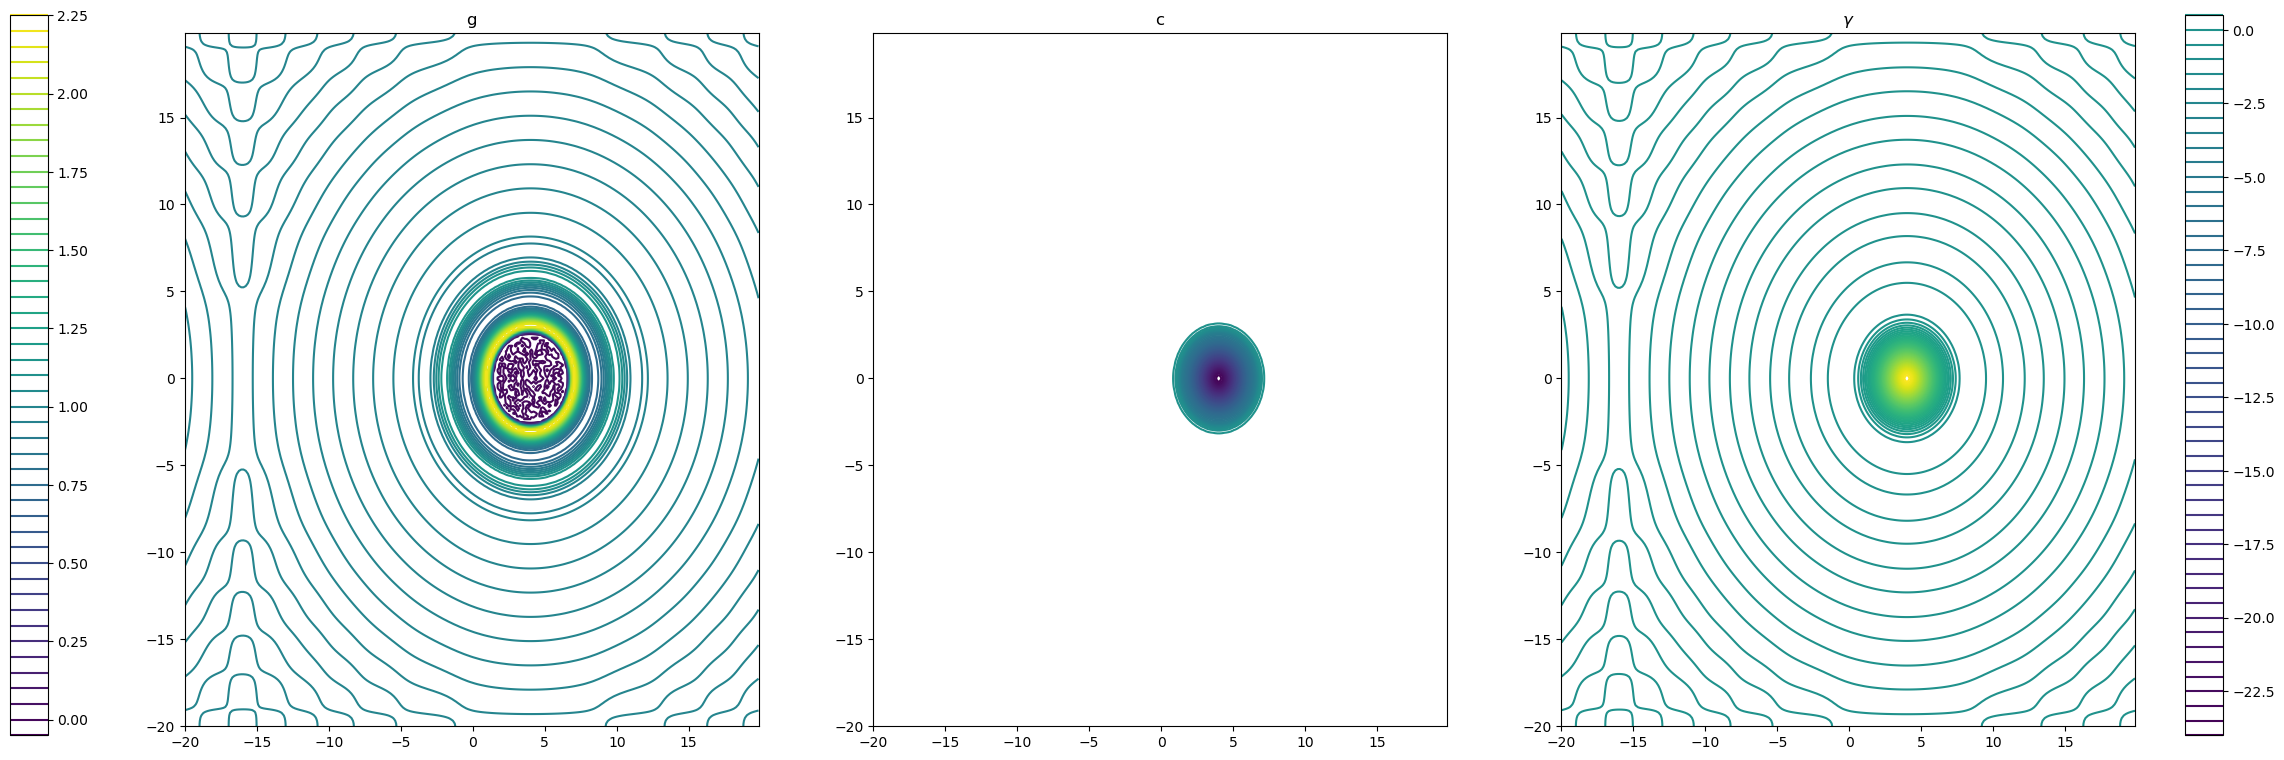

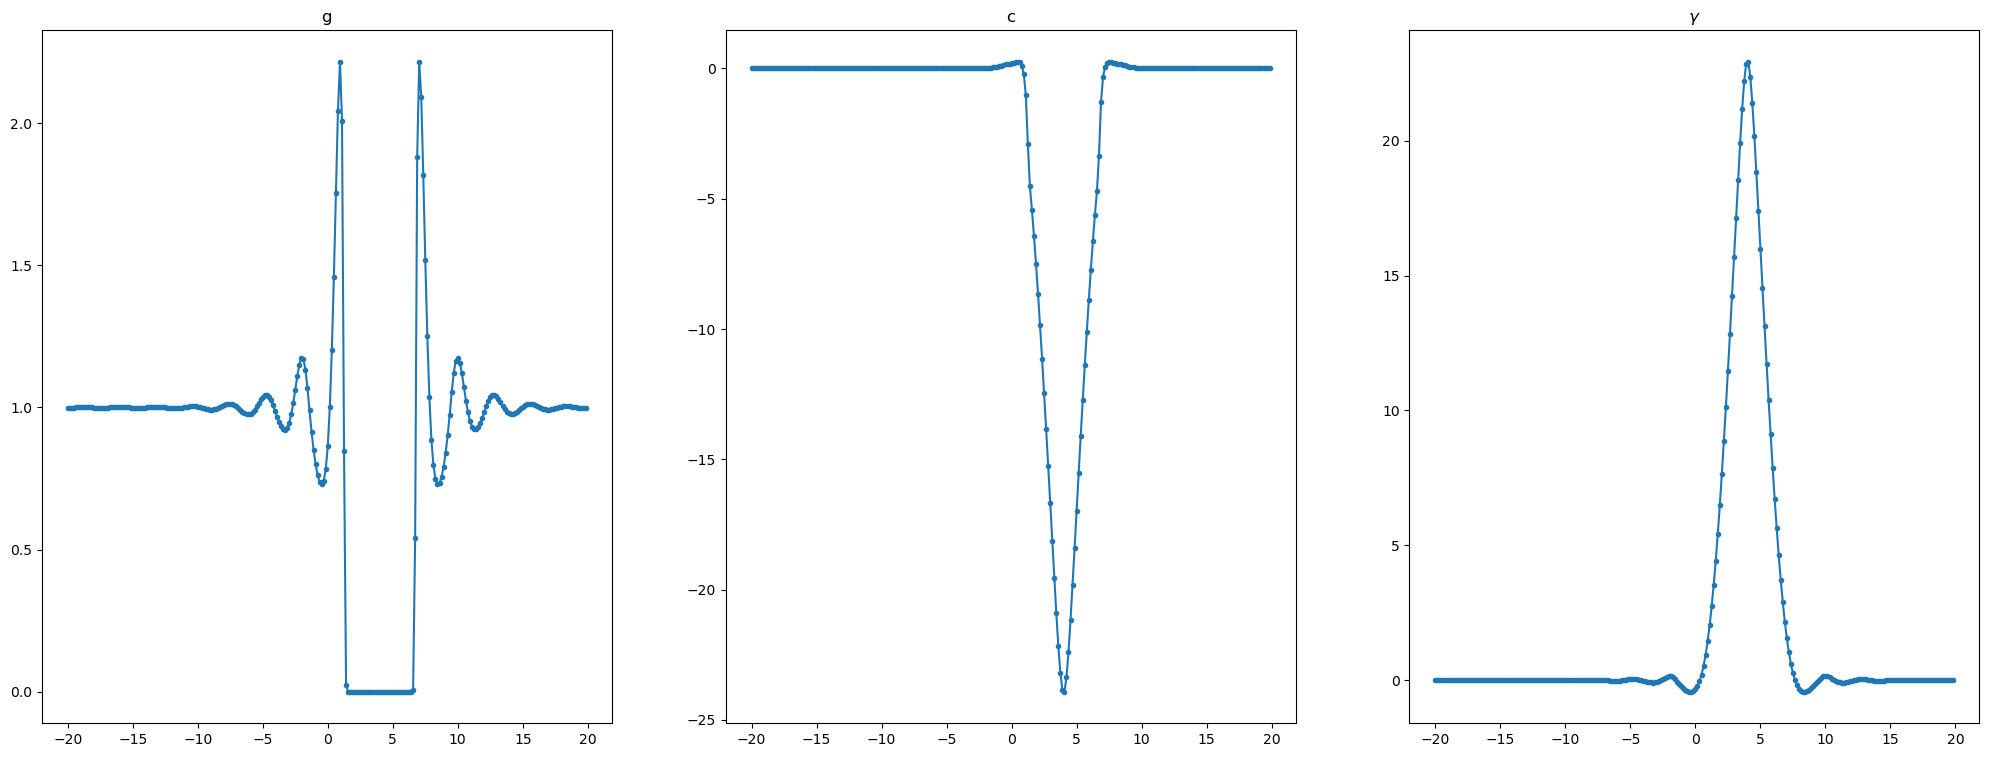

: 

In [5]:
temperature = 300
grid = FFTGrid(x=[-20, 20, 256], y=[-20, 20, 256], z=[-20, 20, 256])
closure = rism.closure.kovalenko_hirata
rho_b = Quantity(1.014, kilogram / decimeter**3) / Quantity(18, dalton) / NA
solver = OZSolventPicard3DSolver(
    grid=grid, temperature=temperature, solvent_type="o", closure=closure, rho_b=rho_b
)
h, c = solver.solve(np.array([4, 0, 0]), max_iterations=500, error_tolerance=1e-5)
visualize(grid, h, c)
visualize(grid, h, c, False)